# Credit Card Users Churn Prediction - Sai Deepak Annamraju

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [211]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To impute missing values
from sklearn.impute import SimpleImputer
from imblearn import over_sampling
from imblearn import under_sampling
from sklearn.model_selection import RandomizedSearchCV

## Loading the dataset

In [105]:
df_original = pd.read_csv('BankChurners.csv')

In [279]:
data = df_original.copy()

## Data Overview

- Observations
- Sanity checks

In [107]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [109]:
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* For 1519 rows, Education_level value is missing.
* For 749 rows, Marital_Status value is missing

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [112]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [113]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [114]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [115]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

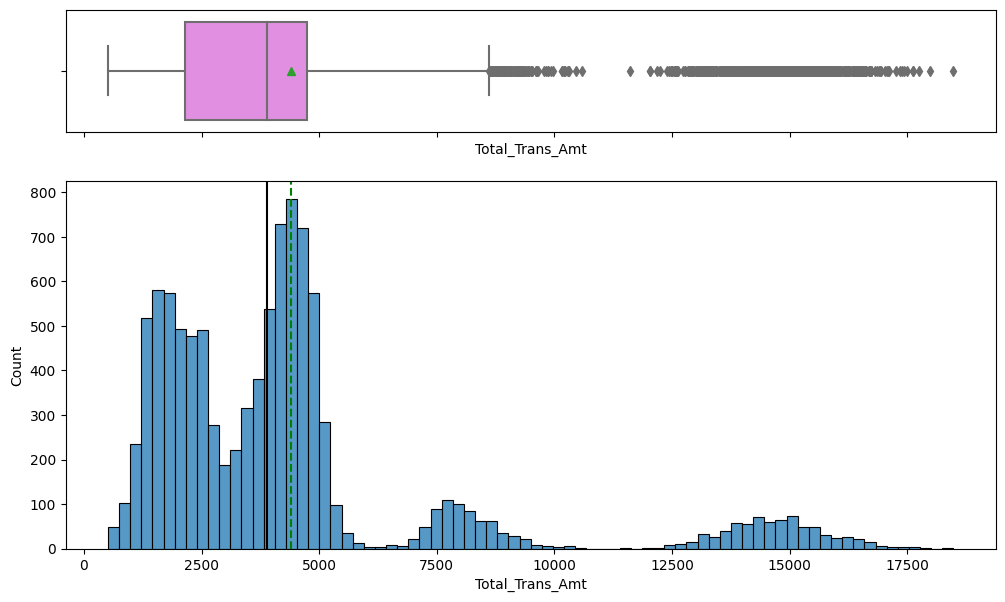

In [117]:
histogram_boxplot(data,'Total_Trans_Amt')

* Outliers exists, but these outliers may contribute to model build

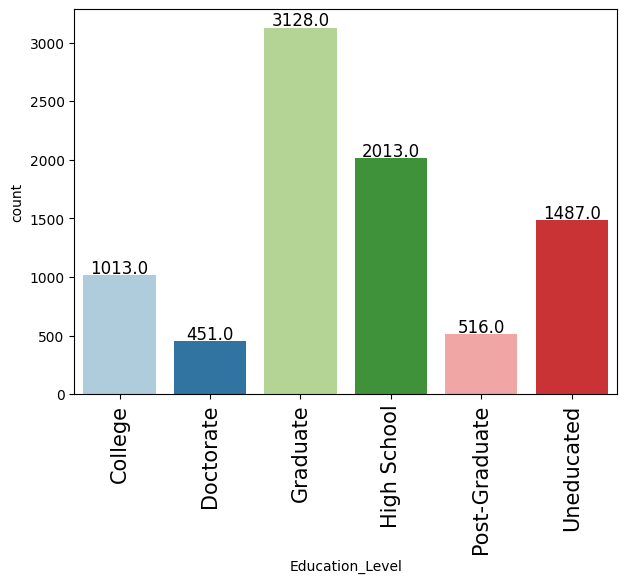

In [118]:
labeled_barplot(data, 'Education_Level')

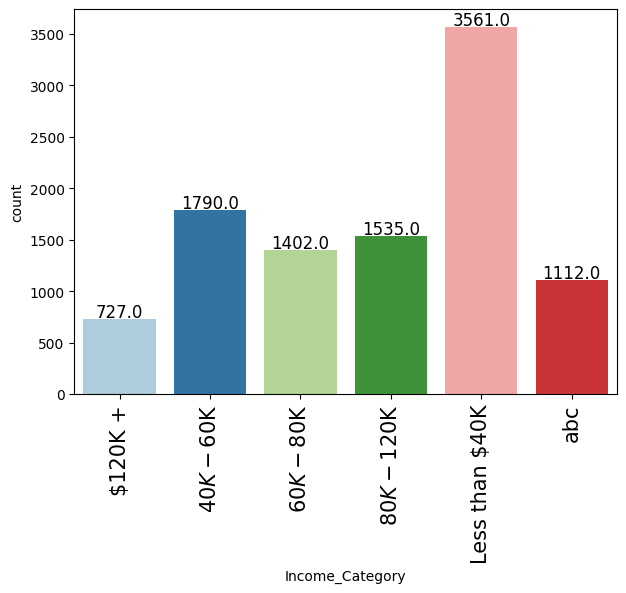

In [119]:
labeled_barplot(data, 'Income_Category')

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


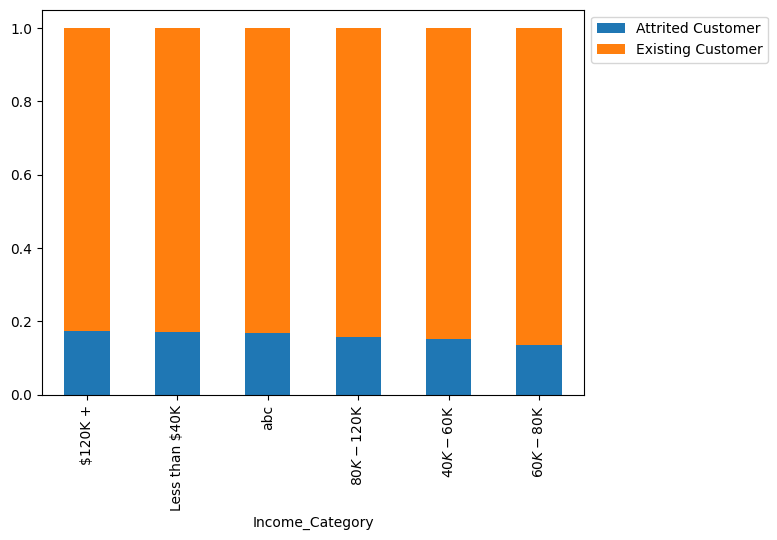

In [120]:
stacked_barplot(data, 'Income_Category', 'Attrition_Flag')

* There is negligible variation in Attrition rate with Income Category

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


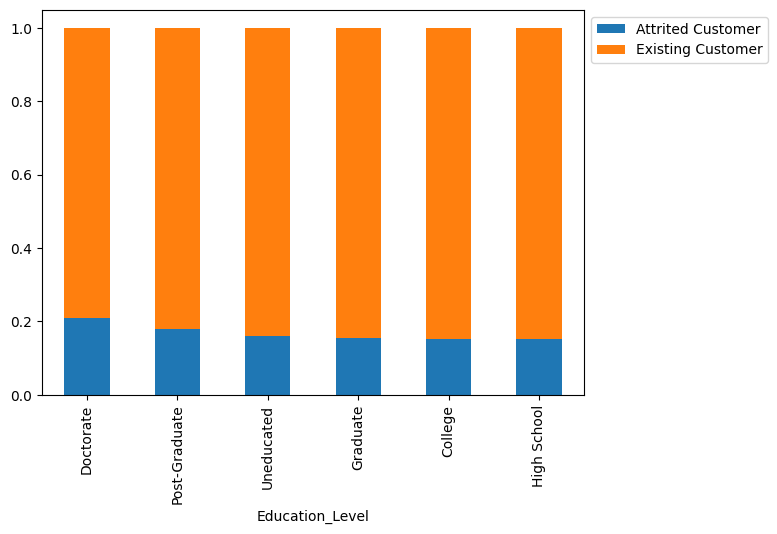

In [121]:
stacked_barplot(data, 'Education_Level', 'Attrition_Flag')

* Attrition rate  is slightly  high in Doctorates

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


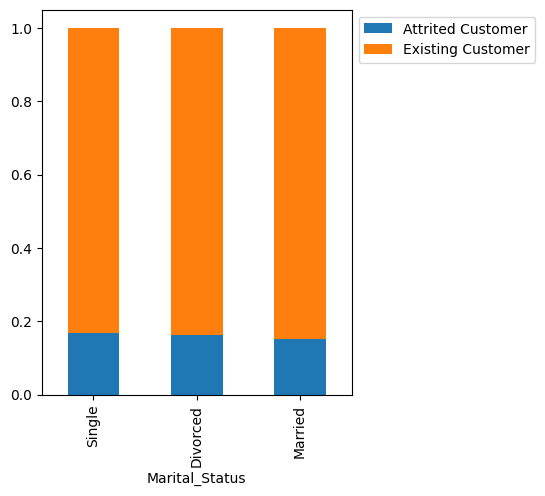

In [122]:
stacked_barplot(data, 'Marital_Status', 'Attrition_Flag')

* It seems Marital Status doesn't have impact on Customer Attrition

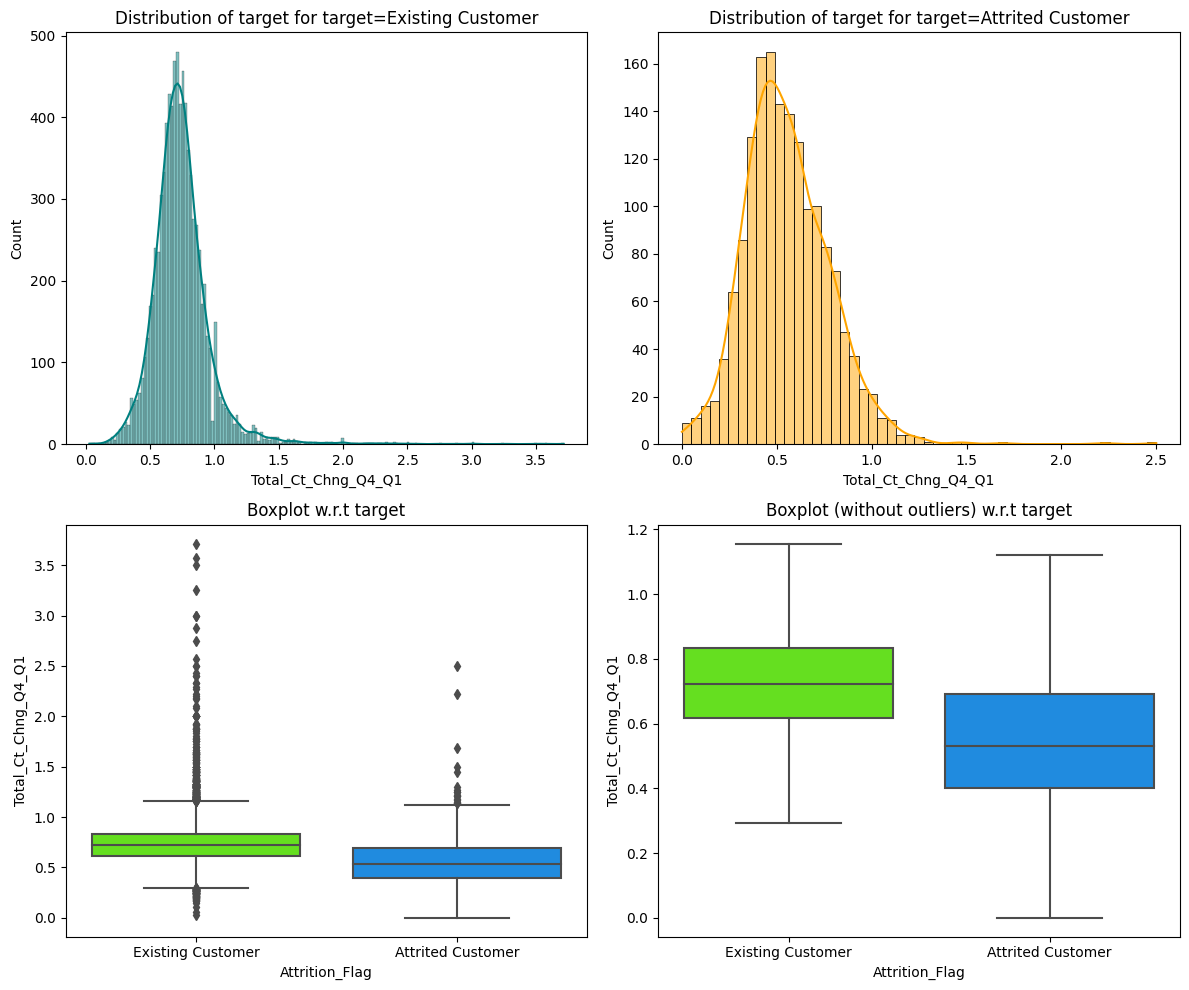

In [123]:
distribution_plot_wrt_target(data,'Total_Ct_Chng_Q4_Q1','Attrition_Flag')

* While for both Existed and Attrited customers, transaction count is reduced in Q4, the reduction is more evident in Attrited customers

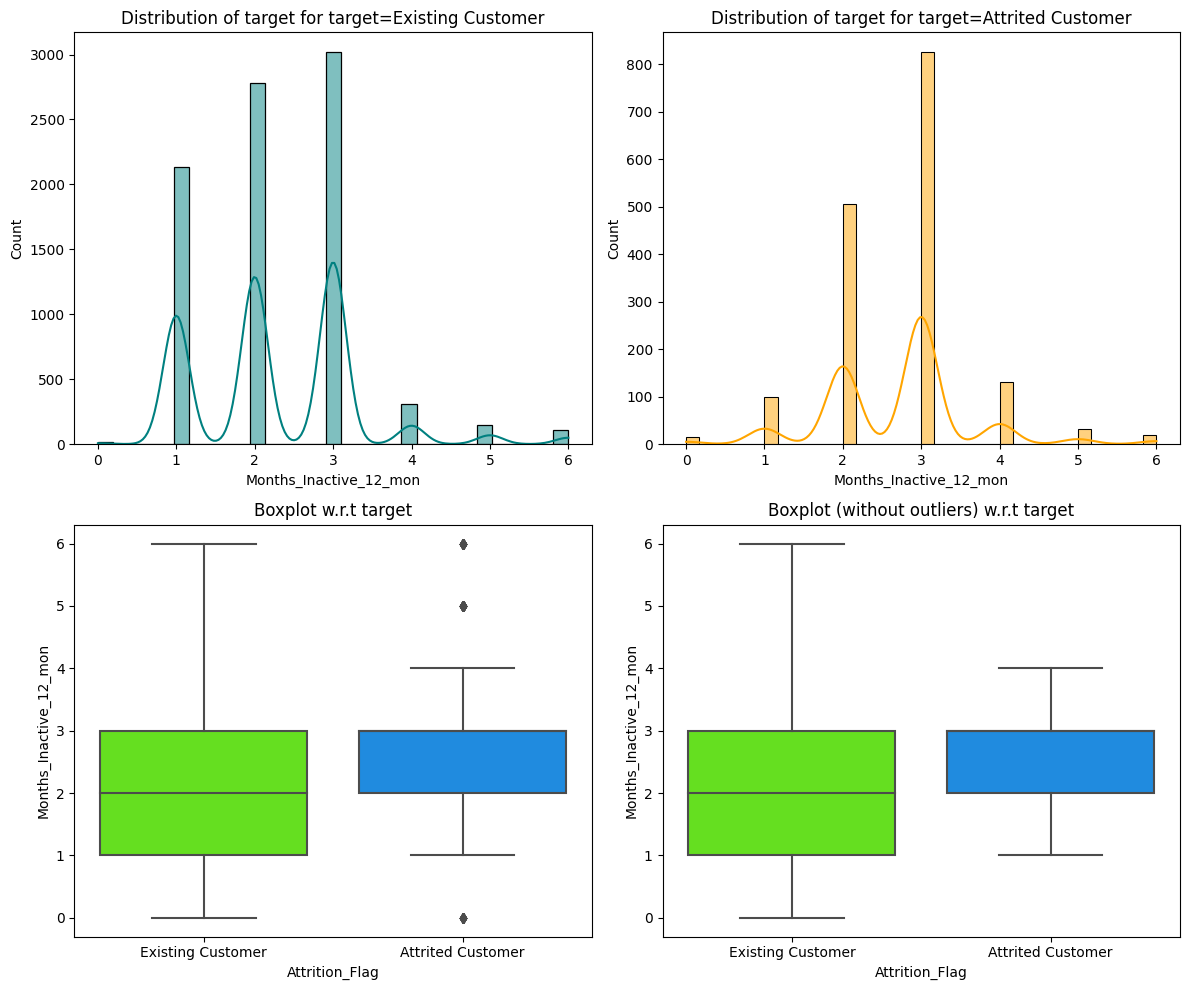

In [124]:

distribution_plot_wrt_target(data,'Months_Inactive_12_mon','Attrition_Flag')

* Comparativley Attrited Customers have more number of Inactive Months

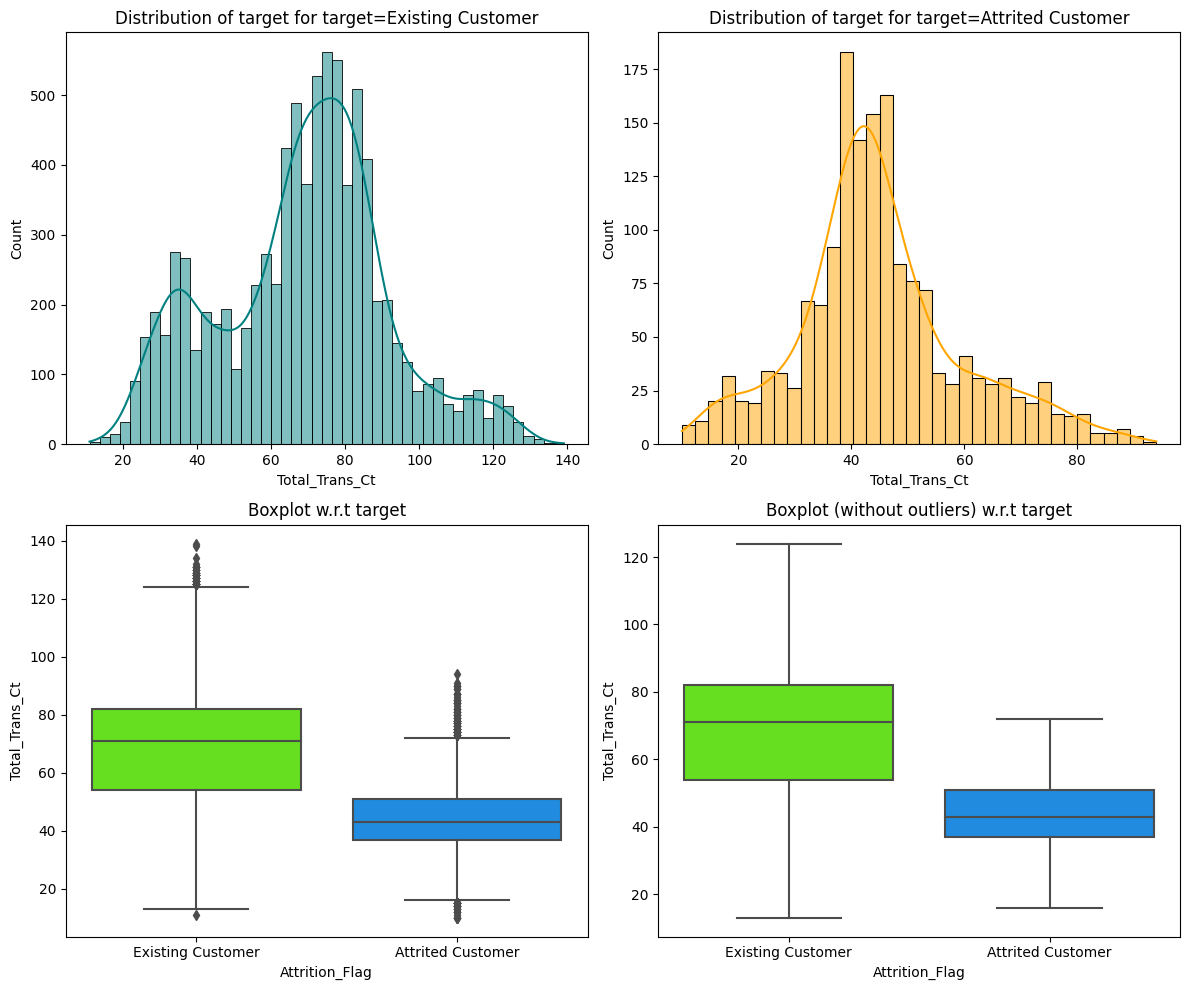

In [280]:
distribution_plot_wrt_target(data,'Total_Trans_Ct','Attrition_Flag')

* Total transaction count is less for Attrited Customers

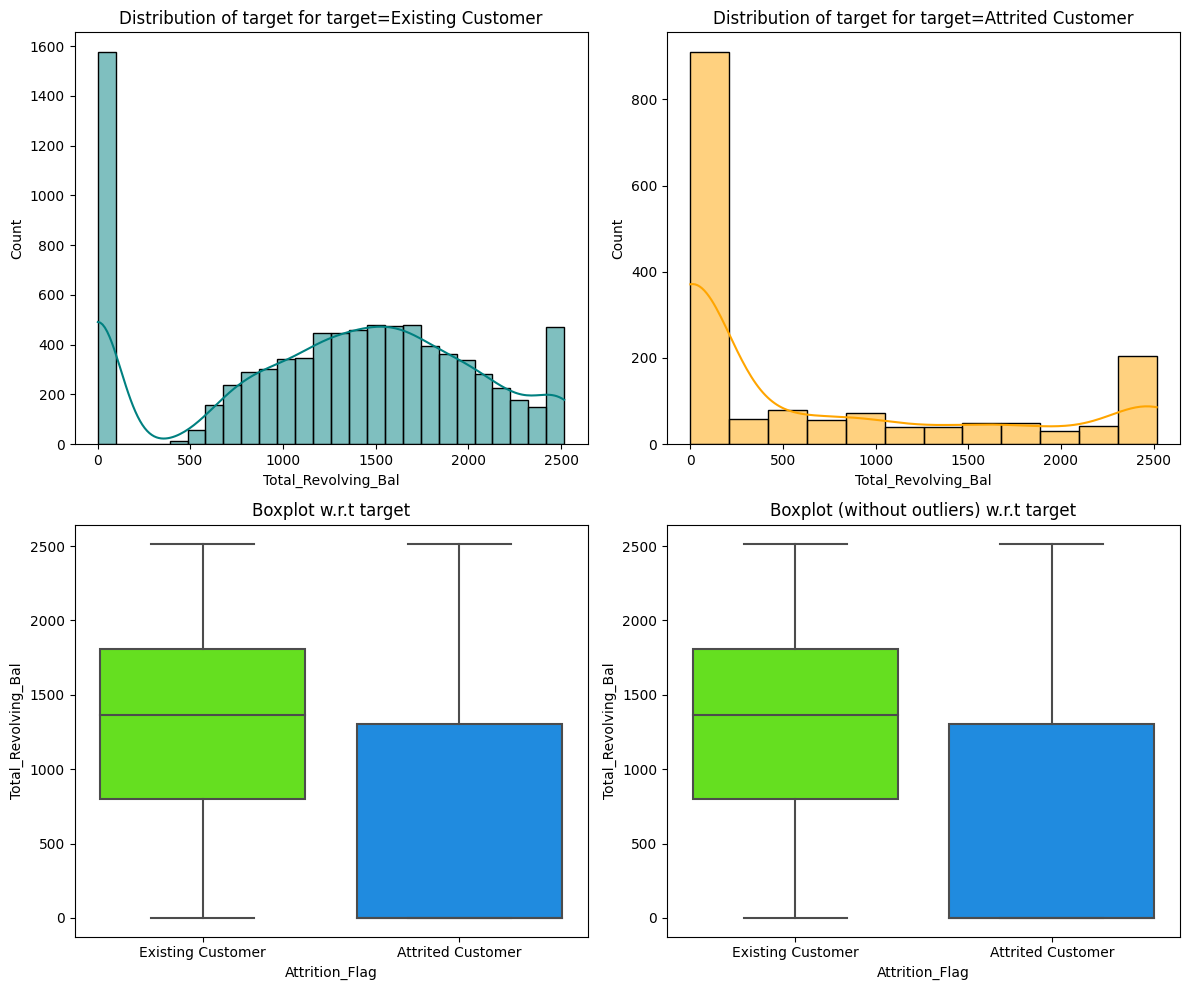

In [282]:
distribution_plot_wrt_target(data,'Total_Revolving_Bal','Attrition_Flag')

* For 50 percentile of 'Attrited Customers' , Total Revolving Balance is zero

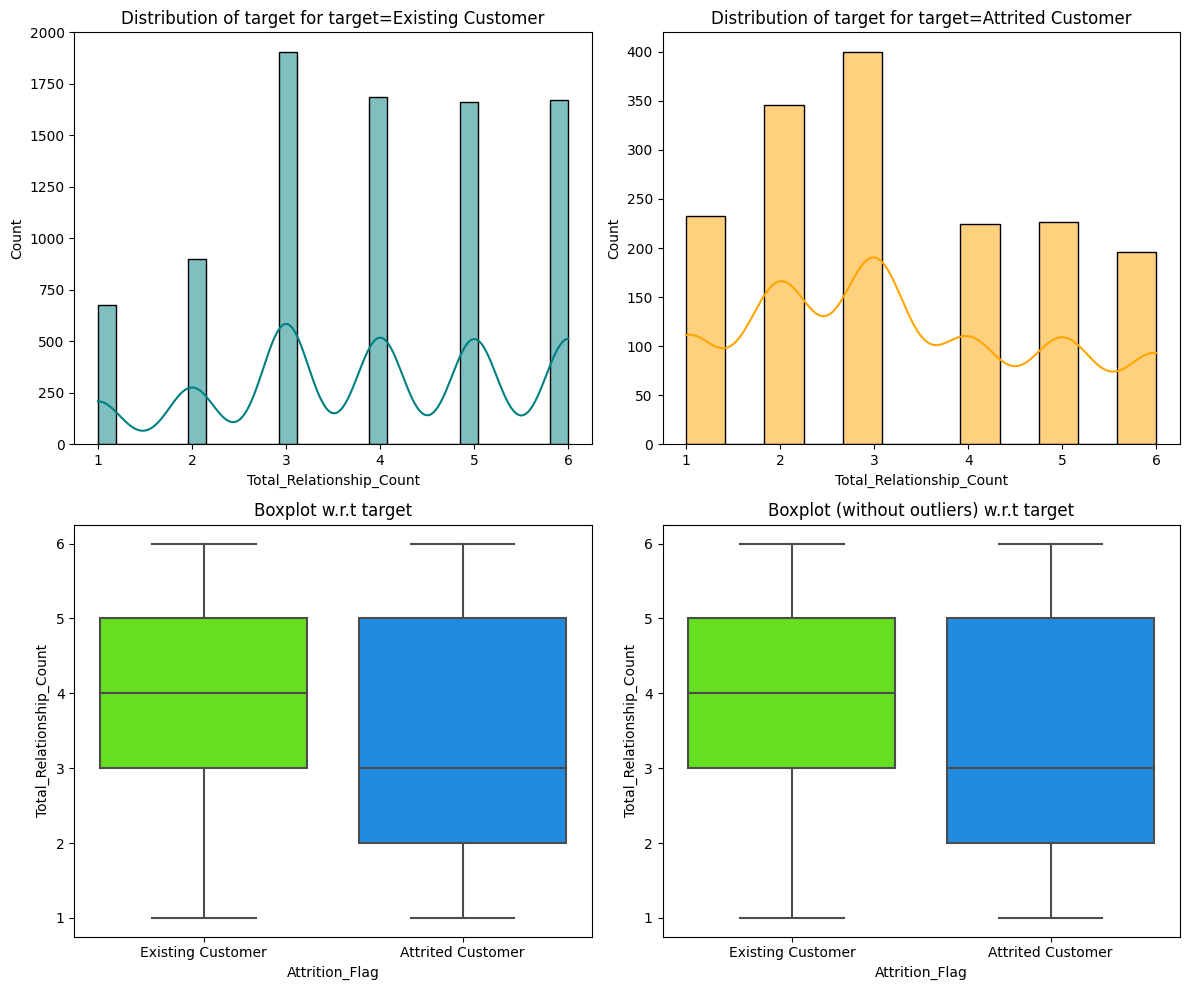

In [281]:
distribution_plot_wrt_target(data,'Total_Relationship_Count','Attrition_Flag')

* 50 percentile of Attrited customers does have 'Total_Relation_Count' at 3 while it is '4' for existing customers

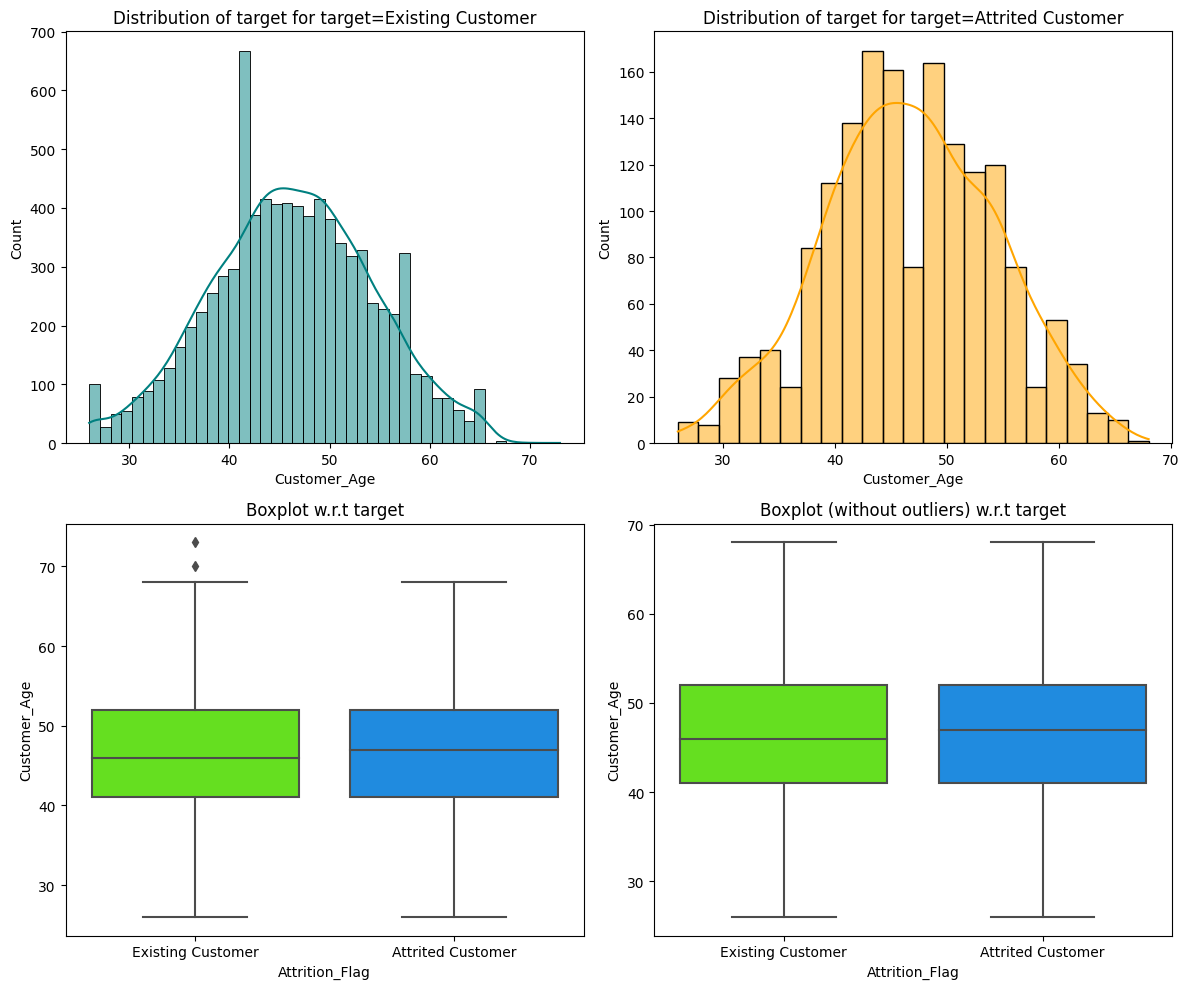

In [283]:
distribution_plot_wrt_target(data,'Customer_Age','Attrition_Flag')

* There is no significant Impact of Customer Age. 

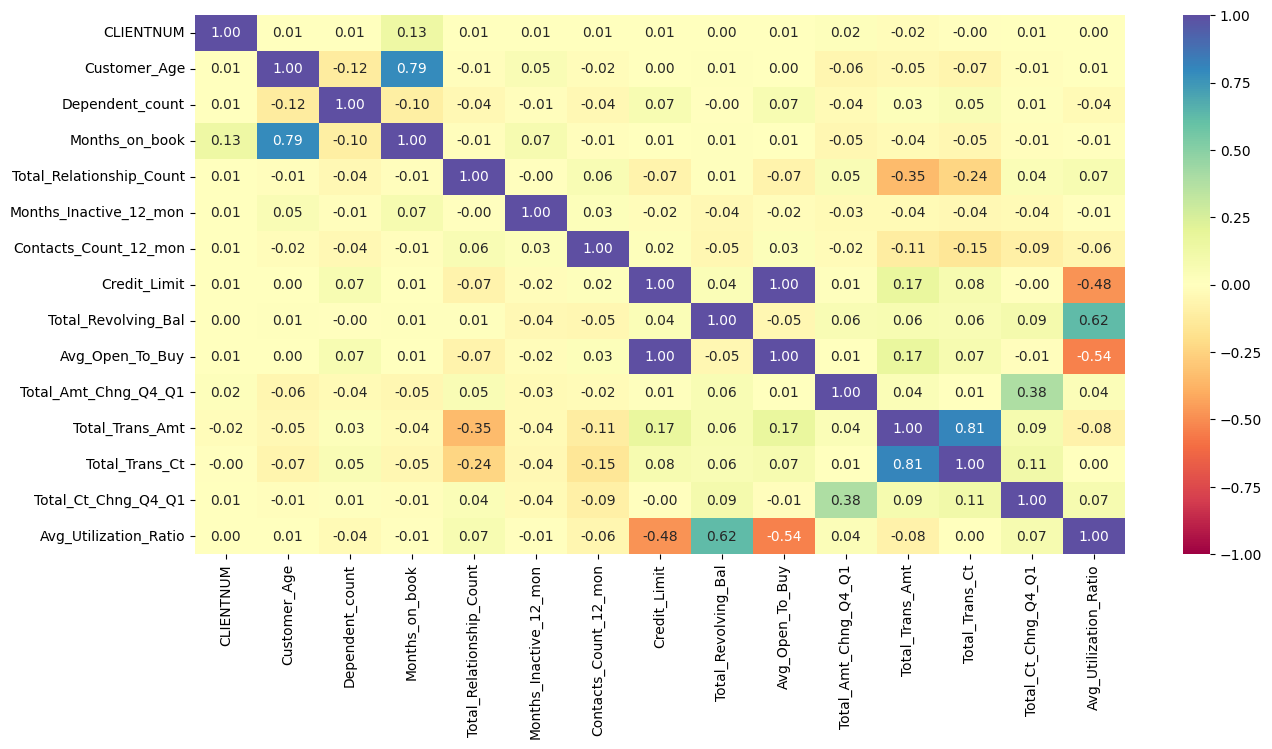

In [125]:
#Corelation only for mumerical data
mumeric_only_data = data.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Attrition_Flag'], axis=1)

corr = mumeric_only_data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Pre-processing

In [127]:
print(data.Education_Level.value_counts())
print(data.Income_Category.value_counts())
print(data.Card_Category.value_counts())

Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [145]:
data["Income_Category"] = data["Income_Category"].astype("category")
data["Education_Level"] = data["Education_Level"].astype("category")
data["Card_Category"] = data["Card_Category"].astype("category")

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  object  
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   object  
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [147]:
# Drop columns which doesn't have impact.
#Client num is not required for model
#Ethically it is not good to have a model Gender biased.
#As we has seen earlier, Marital_Status doesn't have impact on Target variable
data = data.drop(["CLIENTNUM","Gender", "Marital_Status"], axis=1)


In [148]:
data["Attrition_Flag"].value_counts(1)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

* Percentage of Attrited Customers are 16 %. If model predicts all customers are not going to be Attrited, stll model achives 84 % Accuracy. In this case, model not predicting a 'Attrited Customer' may impact a lot. That means model has to achieve good recall score.


* Model has to predict 'Attrition_Flag' to predict if customer is going to be 'Existing customer' or 'Attrited Customer'

In [152]:
replaceStruct = {
                "Attrition_Flag":     {"Existing Customer": 0 , "Attrited Customer": 1 }
                }
                    

data = data.replace(replaceStruct)

In [153]:
data["Attrition_Flag"] = data["Attrition_Flag"].astype("category")

In [154]:
data["Attrition_Flag"].value_counts(1)

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           8608 non-null   category
 4   Income_Category           10127 non-null  category
 5   Card_Category             10127 non-null  category
 6   Months_on_book            10127 non-null  int64   
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Credit_Limit              10127 non-null  float64 
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Avg_Open_To_Buy           10127 non-null  float64 
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

In [156]:
# separating the independent and dependent variables
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

 * Let's split the data before imputing missing values to avoid data leakage

In [157]:
# Split Data to Train, test and Validation


# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6480, 17) (1621, 17) (2026, 17)


In [159]:
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())


Attrition_Flag
0    5439
1    1041
Name: count, dtype: int64
Attrition_Flag
0    1360
1     261
Name: count, dtype: int64
Attrition_Flag
0    1701
1     325
Name: count, dtype: int64


## Missing value imputation




* As we seen previously, 'Education Level' and 'Marital Status' columns have some missing values, We already dropped 'Marital Status'. Since 'Education Level' is categorical value, and also to keep it simple, let's replace missing values with most frequent values.

In [178]:
# Let's impute the missing values
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Education_Level"] = imp_most_frequent.fit_transform(X_train["Education_Level"].values.reshape (-1,1)) [:,0]

# transform the validation and test data using the imputer fit on train data
X_val["Education_Level"] = imp_most_frequent.transform(X_val["Education_Level"].values.reshape (-1,1)) [:,0]

X_test["Education_Level"] = imp_most_frequent.transform(X_test["Education_Level"].values.reshape (-1,1)) [:,0]


In [182]:
print(X_train['Education_Level'].isnull().value_counts())
print(X_val['Education_Level'].isnull().value_counts())
print(X_test['Education_Level'].isnull().value_counts())

Education_Level
False    6480
Name: count, dtype: int64
Education_Level
False    1621
Name: count, dtype: int64
Education_Level
False    2026
Name: count, dtype: int64


In [191]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [228]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(pred, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    #pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [226]:
models = []  # Empty list to store all the models
orig_estimators =dict()
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting Classifier", GradientBoostingClassifier(random_state=1)))
models.append(("DecisionTree Classifier", DecisionTreeClassifier(random_state=1)))



print("\n" "Training and Validation Performance:" "\n")
for name, model in models:
    estimator= model.fit(X_train, y_train)
    orig_estimators[name] = estimator
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    print(name +':'+'\n')
    print("Training Data Recall score:  {}  and Validation Data Recall score: {} \n".format( scores_train, scores_val))





Training and Validation Performance:

Bagging:

Training Data Recall score:  0.9817483189241114  and Validation Data Recall score: 0.8390804597701149 

Random forest:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.8045977011494253 

AdaBoost Classifier:

Training Data Recall score:  0.8578290105667628  and Validation Data Recall score: 0.8659003831417624 

GradientBoosting Classifier:

Training Data Recall score:  0.8818443804034583  and Validation Data Recall score: 0.8620689655172413 

DecisionTree Classifier:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.8007662835249042 



### Model Building with Oversampled data


In [200]:
# Synthetic Minority Over Sampling Technique
sm = over_sampling.SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [252]:
print("\n" "Training and Validation Performance:" "\n")

orig_over_ests = dict()

for name, model in models:
    estimator = model.fit(X_train_over, y_train_over)
    orig_over_ests [name] = estimator 
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    print(name +':'+'\n')
    print("Training Data Recall score:  {}  and Validation Data Recall score: {} \n".format( scores_train, scores_val))


Training and Validation Performance:

Bagging:

Training Data Recall score:  0.9875120076849183  and Validation Data Recall score: 0.8697318007662835 

Random forest:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.8812260536398467 

AdaBoost Classifier:

Training Data Recall score:  0.8933717579250721  and Validation Data Recall score: 0.8812260536398467 

GradientBoosting Classifier:

Training Data Recall score:  0.9375600384245918  and Validation Data Recall score: 0.9157088122605364 

DecisionTree Classifier:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.8697318007662835 



### Model Building with Undersampled data

In [208]:
# Random undersampler for under sampling the data
rus = under_sampling.RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [253]:
print("\n" "Training and Validation Performance:" "\n")

orig_under_ests = dict()
for name, model in models:
    estimator = model.fit(X_train_un, y_train_un)
    orig_under_ests[name] = estimator 
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    print(name +':'+'\n')
    print("Training Data Recall score:  {}  and Validation Data Recall score: {} \n".format( scores_train, scores_val))


Training and Validation Performance:

Bagging:

Training Data Recall score:  0.9951969260326609  and Validation Data Recall score: 0.946360153256705 

Random forest:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.9578544061302682 

AdaBoost Classifier:

Training Data Recall score:  0.9548511047070125  and Validation Data Recall score: 0.9578544061302682 

GradientBoosting Classifier:

Training Data Recall score:  0.9855907780979827  and Validation Data Recall score: 0.9655172413793104 

DecisionTree Classifier:

Training Data Recall score:  1.0  and Validation Data Recall score: 0.8812260536398467 



### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [221]:
import warnings
warnings.filterwarnings('ignore')

estimators = dict()


param_grid_gradient = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}


param_grid_ada = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

param_grid_bagging = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

param_grid_random = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


param_grid_decision = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

param_grid_mapper= {
"Bagging" :  param_grid_bagging, 
"Random forest": param_grid_random, 
"AdaBoost Classifier" : param_grid_ada,
"GradientBoosting Classifier" :  param_grid_gradient,
"DecisionTree Classifier": param_grid_decision

    
}       

for name, model in models:
    scorer = metrics.make_scorer(metrics.recall_score)
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_mapper[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    estimators[name] = randomized_cv.fit(X_train,y_train)
    print(name +':'+'\n')
    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))




Bagging:

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8414703717335297:
Random forest:

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7752208317997792:
AdaBoost Classifier:

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.868398049319102:
GradientBoosting Classifier:

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8606919396393081:
DecisionTree Classifier:

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7819608023555392:


#### Sample tuning method for all models with oversampled data

In [222]:
estimators_over = dict()

for name, model in models:
    scorer = metrics.make_scorer(metrics.recall_score)
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_mapper[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    estimators_over[name] = randomized_cv.fit(X_train_over,y_train_over)
    print(name +':'+'\n')
    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))#Calling RandomizedSearchCV


Bagging:

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.9845581470858813:
Random forest:

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9836393676605878:
AdaBoost Classifier:

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.954226419178527:
GradientBoosting Classifier:

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9650726838573516:
DecisionTree Classifier:

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.9102783903349747:


#### Sample tuning method for all models with undersampled data

In [223]:
estimators_under = dict()

for name, model in models:
    scorer = metrics.make_scorer(metrics.recall_score)
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid_mapper[name], n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
    estimators_under[name] = randomized_cv.fit(X_train_un,y_train_un)
    print(name +':'+'\n')
    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))#Calling RandomizedSearchCV


Bagging:

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.9557968347442032:
Random forest:

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9414105631210894:
AdaBoost Classifier:

Best parameters are {'n_estimators': 60, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9529306220095695:
GradientBoosting Classifier:

Best parameters are {'subsample': 1, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9529214206845784:
DecisionTree Classifier:

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.9087734633787266:


## Model Comparison and Final Model Selection

In [254]:
print( "Scores for Original Models with out any tuning , under sampling or over sampling \n")
for name in orig_estimators:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(orig_estimators[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(orig_estimators[name].predict(X_test), y_test))

Scores for Original Models with out any tuning , under sampling or over sampling 

Train and Test Data scores for Model: Bagging

   Accuracy    Recall  Precision        F1
0  0.951698  0.995197   0.770833  0.868763
   Accuracy    Recall  Precision        F1
0  0.923495  0.926154   0.696759  0.795244
Train and Test Data scores for Model: Random forest

   Accuracy  Recall  Precision       F1
0  0.952469     1.0   0.771683  0.87113
   Accuracy    Recall  Precision        F1
0   0.92695  0.935385   0.705336  0.804233
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.932407  0.954851    0.71769  0.819456
   Accuracy    Recall  Precision        F1
0  0.915597  0.932308   0.670354  0.779923
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy    Recall  Precision        F1
0  0.953549  0.985591   0.782012  0.872078
   Accuracy    Recall  Precision        F1
0  0.936821  0.947692   0.735084  0.827957
Train and

In [255]:
print( "Scores for Original Models with out tuning for  over sampled Data  ")
for name in orig_over_ests:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(orig_over_ests[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(orig_over_ests[name].predict(X_test), y_test))

Scores for Original Models with out tuning for  over sampled Data  
Train and Test Data scores for Model: Bagging

   Accuracy    Recall  Precision        F1
0  0.951698  0.995197   0.770833  0.868763
   Accuracy    Recall  Precision        F1
0  0.923495  0.926154   0.696759  0.795244
Train and Test Data scores for Model: Random forest

   Accuracy  Recall  Precision       F1
0  0.952469     1.0   0.771683  0.87113
   Accuracy    Recall  Precision        F1
0   0.92695  0.935385   0.705336  0.804233
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.932407  0.954851    0.71769  0.819456
   Accuracy    Recall  Precision        F1
0  0.915597  0.932308   0.670354  0.779923
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy    Recall  Precision        F1
0  0.953549  0.985591   0.782012  0.872078
   Accuracy    Recall  Precision        F1
0  0.936821  0.947692   0.735084  0.827957
Train and Test Data scor

In [260]:
print( "Scores for Original Models with out tuning for under sampled Data  ")
for name in orig_under_ests:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(orig_under_ests[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(orig_under_ests[name].predict(X_test), y_test))

Scores for Original Models with out tuning for under sampled Data  
Train and Test Data scores for Model: Bagging

   Accuracy    Recall  Precision        F1
0  0.951698  0.995197   0.770833  0.868763
   Accuracy    Recall  Precision        F1
0  0.923495  0.926154   0.696759  0.795244
Train and Test Data scores for Model: Random forest

   Accuracy  Recall  Precision       F1
0  0.952469     1.0   0.771683  0.87113
   Accuracy    Recall  Precision        F1
0   0.92695  0.935385   0.705336  0.804233
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.932407  0.954851    0.71769  0.819456
   Accuracy    Recall  Precision        F1
0  0.915597  0.932308   0.670354  0.779923
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy    Recall  Precision        F1
0  0.953549  0.985591   0.782012  0.872078
   Accuracy    Recall  Precision        F1
0  0.936821  0.947692   0.735084  0.827957
Train and Test Data scor

In [257]:
print( "Scores for Tuned Models ")
for name in estimators:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(estimators[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(estimators[name].predict(X_test), y_test))

Scores for Tuned Models 
Train and Test Data scores for Model: Bagging

   Accuracy    Recall  Precision        F1
0  0.999846  0.999039        1.0  0.999519
   Accuracy    Recall  Precision        F1
0  0.957552  0.836923   0.891803  0.863492
Train and Test Data scores for Model: Random forest

   Accuracy    Recall  Precision        F1
0  0.996759  0.980788   0.999022  0.989821
   Accuracy    Recall  Precision        F1
0  0.952122  0.796923   0.893103  0.842276
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.994907  0.982709   0.985549  0.984127
   Accuracy    Recall  Precision        F1
0  0.959526  0.870769   0.876161  0.873457
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy   Recall  Precision        F1
0  0.989352  0.95293   0.980237  0.966391
   Accuracy    Recall  Precision        F1
0  0.969891  0.876923   0.931373  0.903328
Train and Test Data scores for Model: DecisionTree Classifier



In [258]:
print( "Scores for Tuned Models with  over sampled data")
for name in estimators_over:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(estimators_over[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(estimators_over[name].predict(X_test), y_test))

Scores for Tuned Models with  over sampled data
Train and Test Data scores for Model: Bagging

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
   Accuracy    Recall  Precision        F1
0  0.958045  0.901538   0.846821  0.873323
Train and Test Data scores for Model: Random forest

   Accuracy    Recall  Precision        F1
0  0.998765  0.999039   0.993314  0.996169
   Accuracy    Recall  Precision        F1
0  0.945212  0.870769   0.803977  0.836041
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.988889  0.975985   0.955786  0.965779
   Accuracy    Recall  Precision        F1
0  0.961994  0.916923   0.856322  0.885587
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy    Recall  Precision        F1
0  0.983796  0.963497   0.937383  0.950261
   Accuracy    Recall  Precision        F1
0  0.959033  0.904615   0.849711  0.876304
Train and Test Data scores for Model: DecisionTree C

In [259]:
print( "Scores for Tuned Models with under sampled data")
for name in estimators_under:
    print("Train and Test Data scores for Model: " + name + "\n")
    print(model_performance_classification_sklearn(estimators_under[name].predict(X_train), y_train))
    print(model_performance_classification_sklearn(estimators_under[name].predict(X_test), y_test))

Scores for Tuned Models with under sampled data
Train and Test Data scores for Model: Bagging

   Accuracy  Recall  Precision        F1
0  0.952315     1.0   0.771111  0.870765
   Accuracy    Recall  Precision        F1
0  0.933366  0.950769   0.721963  0.820717
Train and Test Data scores for Model: Random forest

   Accuracy    Recall  Precision        F1
0  0.936728  0.986551   0.721715  0.833604
   Accuracy    Recall  Precision        F1
0  0.916091  0.935385   0.671082  0.781491
Train and Test Data scores for Model: AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.949074  0.970221   0.771581  0.859574
   Accuracy  Recall  Precision        F1
0  0.930405    0.96   0.709091  0.815686
Train and Test Data scores for Model: GradientBoosting Classifier

   Accuracy    Recall  Precision        F1
0  0.948765  0.979827   0.766341  0.860034
   Accuracy    Recall  Precision     F1
0  0.934847  0.950769   0.727059  0.824
Train and Test Data scores for Model: DecisionTree C

* Compared to simple Decision tree, Bagging and Boosting improved Recall score in all the cases
* Tuning alone didn't improve the model performance
* Under sampling and Over sampling improved the model scores
* Both 'Orginal Gradient Boosting Classifier with out any tuning and with out sampling the data' and 'Tuned AdaBoost Classifier with under sampled data' perfomed with better recall score ,  no under / over fitting and good accuracy.
* Orginal Gradient Boosting Classifier with out any tuning and with out sampling the data is chosen as final Model. 


### Test set final performance

In [263]:
print(model_performance_classification_sklearn(orig_estimators["GradientBoosting Classifier"].predict(X_train), y_train))
print(model_performance_classification_sklearn(orig_estimators["GradientBoosting Classifier"].predict(X_val), y_val))
print(model_performance_classification_sklearn(orig_estimators["GradientBoosting Classifier"].predict(X_test), y_test))

   Accuracy    Recall  Precision        F1
0  0.953549  0.985591   0.782012  0.872078
   Accuracy    Recall  Precision        F1
0  0.945713  0.965517   0.761329  0.851351
   Accuracy    Recall  Precision        F1
0  0.936821  0.947692   0.735084  0.827957


In [270]:
def make_confusion_matrix(model,X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

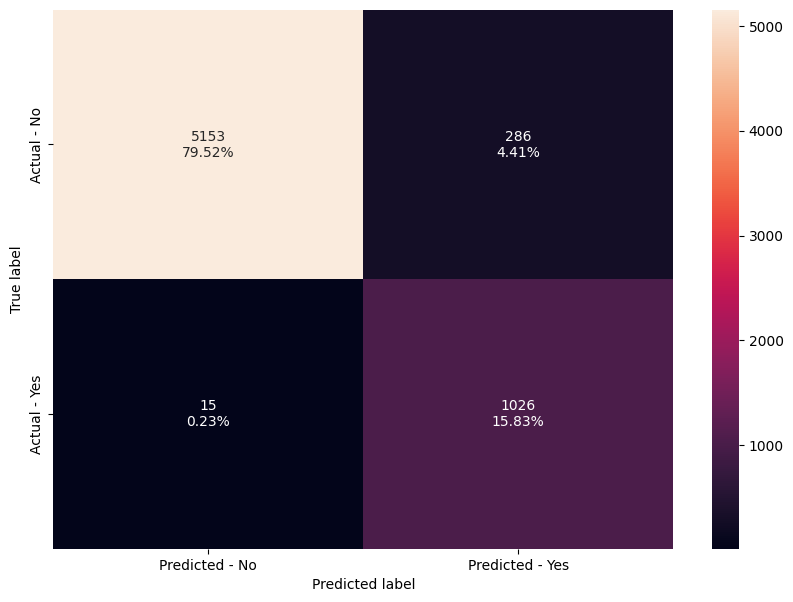

In [273]:
make_confusion_matrix(orig_estimators["GradientBoosting Classifier"],X_train, y_train)

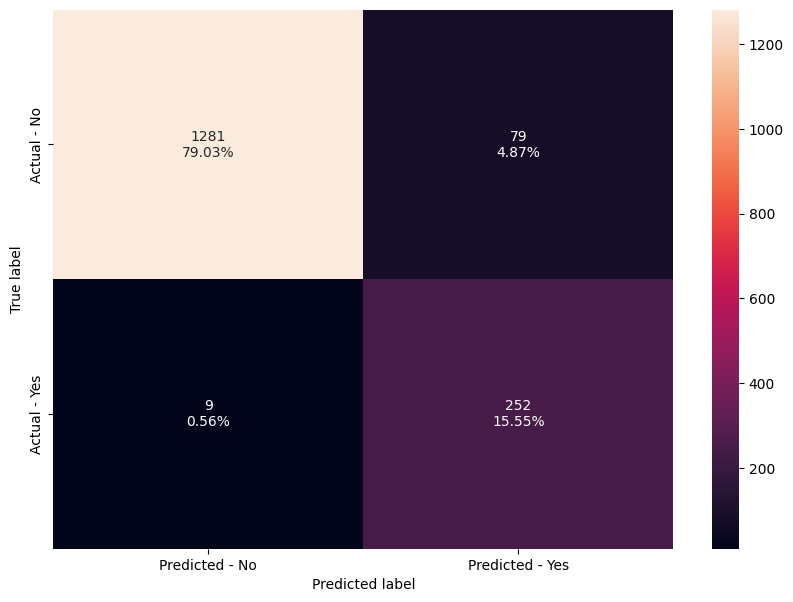

In [274]:
make_confusion_matrix(orig_estimators["GradientBoosting Classifier"],X_val, y_val)

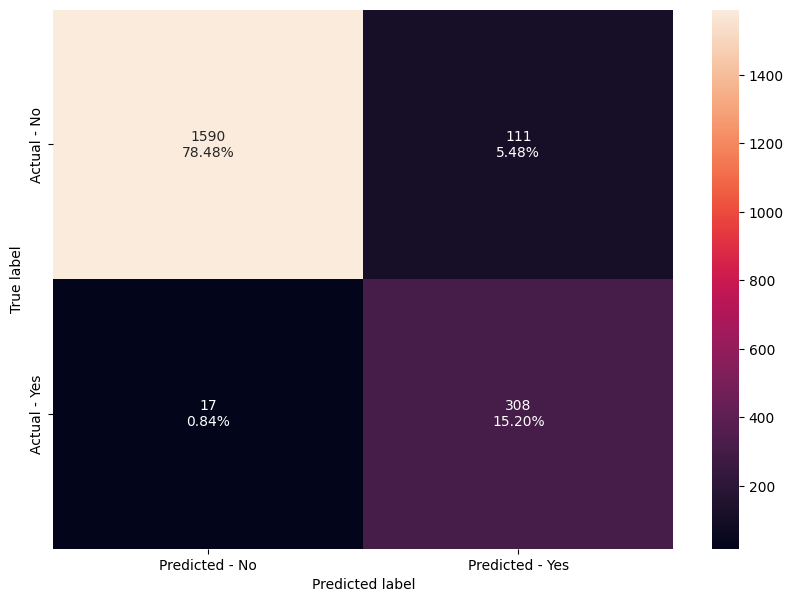

In [275]:
make_confusion_matrix(orig_estimators["GradientBoosting Classifier"],X_test, y_test)

* Selected Model performance is consistent across Training, Validation and Test data.
* This model needs high recall score to predict customer who can be 'Attrited' and selected model has better recall scores

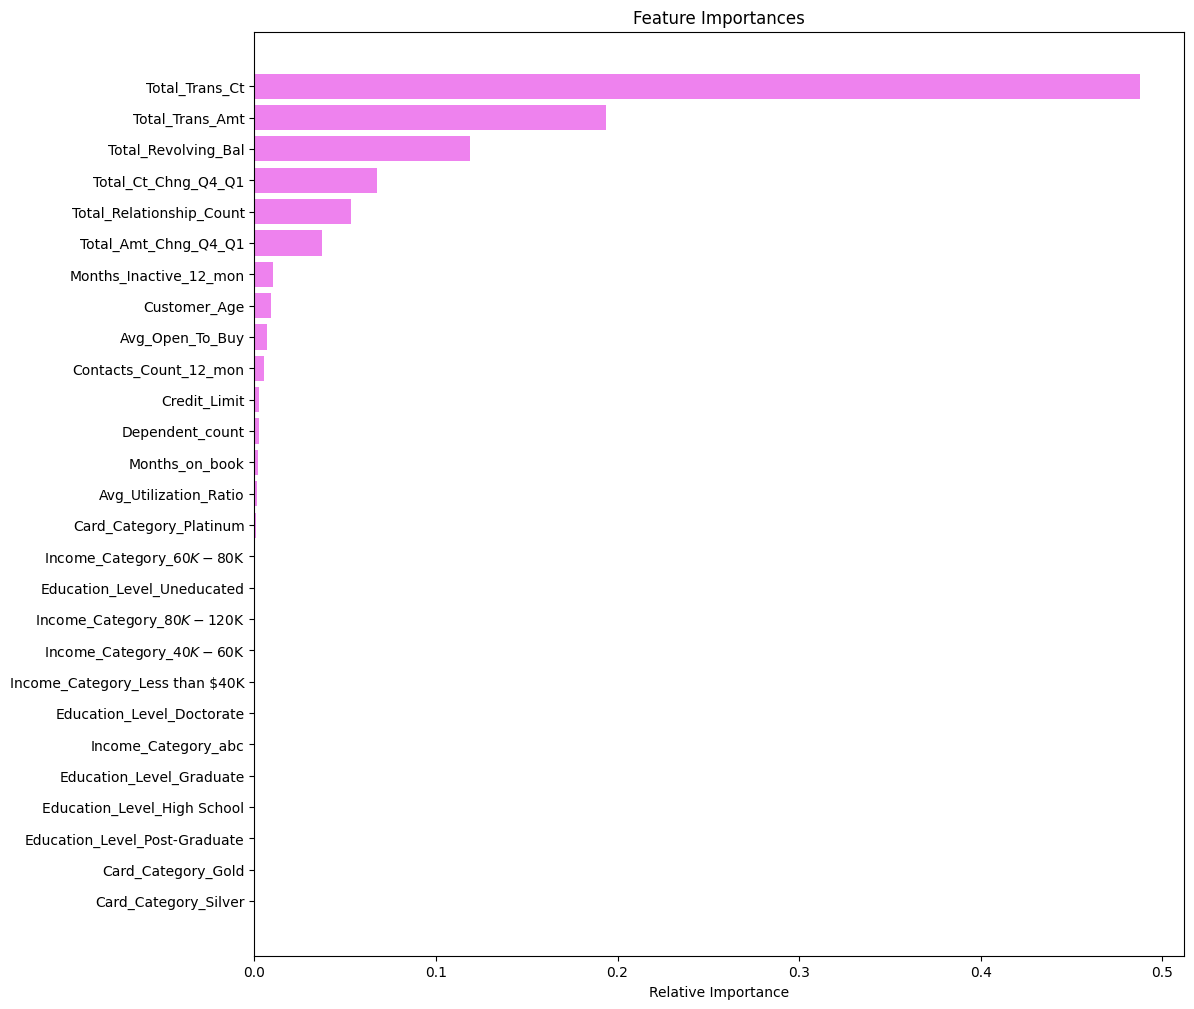

In [277]:
importances = orig_estimators["GradientBoosting Classifier"].feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Total tranaction count has siginificant importance.
* Total Transaction Amount, Total revolving balance, Total count change Q4 over Q1, Total Relationhip count and Total amount change Q4 over Q1 are also important features for model

# Business Insights and Conclusions

***

* Thera bank can concentrate on customers whose total transaction count is reduced or less.
* Thera bank can reach out to customers or give some promotional offers whose roll over balance is less or zero.
* Thera bank can offer additional products from bank.
* If there is siginificant change in transaction count, bank can reachout to customers and provide additional promotional offers
